# Arctic Lake Bathymetry
#### Exploratory Data Analysis - ICESat ATL13
#### Melanie Frost
#### 4/18/2023

In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt 

import seaborn as sns

In [3]:
df = pd.read_csv('data/lakes_clean.csv')
df.head()

,cycle,id,size,type,cloud_flag,bkgrd_flag,shallow_flag,wind_flag,rgt,seg_lat,...,qual2,qual3,orientation,beg_lat,beg_lon,end_lat,end_lon,sc_orient,quality_metric,beam_strength
0,4,2546,4,1,0,1.0,0,1,266,67.520551,...,0,0,NaN,67.519020,-148.468245,67.519020,-148.468773,0.0,1.000000,Strong
1,4,2546,4,1,0,1.0,0,1,266,67.520859,...,2,0,NaN,67.520765,-148.468775,67.520765,-148.468833,0.0,0.971698,Strong
2,4,2546,4,1,0,1.0,0,1,266,67.521048,...,2,0,NaN,67.520953,-148.468833,67.520953,-148.468889,0.0,0.981132,Strong
3,4,2546,4,1,0,1.0,0,1,266,67.521236,...,5,0,NaN,67.521142,-148.468891,67.521142,-148.468950,0.0,0.954128,Strong
4,4,2546,4,1,0,1.0,0,1,266,67.521432,...,3,0,NaN,67.521337,-148.468950,67.521337,-148.469007,0.0,0.953271,Strong


In [16]:
df = df.drop('orientation', axis = 1)
df.shape
#df.head

<bound method NDFrame.head of         cycle    id  size  type  cloud_flag  bkgrd_flag  shallow_flag  \
0           4  2546     4     1           0         1.0             0   
1           4  2546     4     1           0         1.0             0   
2           4  2546     4     1           0         1.0             0   
3           4  2546     4     1           0         1.0             0   
4           4  2546     4     1           0         1.0             0   
...       ...   ...   ...   ...         ...         ...           ...   
100409     16  2124     4     1           0         2.0             0   
100410     16  2124     4     1           0         2.0             0   
100411     16  2124     4     1           0         2.0             0   
100412     16  2124     4     1           0         2.0             0   
100413     16  2124     4     1           0         2.0             0   

        wind_flag   rgt    seg_lat  ...  qual1  qual2  qual3    beg_lat  \
0               1 

In [17]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100414 entries, 0 to 100413
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   cycle           100414 non-null  int64  
 1   id              100414 non-null  int64  
 2   size            100414 non-null  int64  
 3   type            100414 non-null  int64  
 4   cloud_flag      100414 non-null  int64  
 5   bkgrd_flag      100414 non-null  float64
 6   shallow_flag    100414 non-null  int64  
 7   wind_flag       100414 non-null  int64  
 8   rgt             100414 non-null  int64  
 9   seg_lat         100414 non-null  float64
 10  seg_lon         100414 non-null  float64
 11  snow_ice_flag   100414 non-null  int64  
 12  wave_flag       100414 non-null  float64
 13  depth           100414 non-null  float64
 14  anomalies       100414 non-null  float64
 15  beam            100414 non-null  object 
 16  start_date      100414 non-null  object 
 17  qual0     

1    100414
Name: type, dtype: int64


<AxesSubplot: xlabel='type', ylabel='count'>

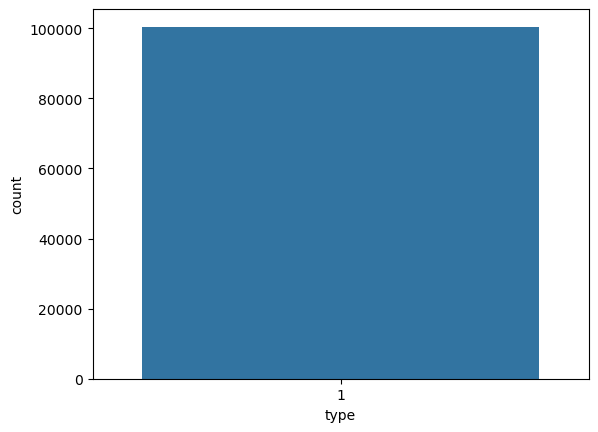

In [18]:
#Type of Inland Water Body, where 1=Lake,
#2=Known Reservoir, 3=(Reserved for future use),
#4=Ephemeral Water, 5=River, 6=Estuary or Bay,
#7=Coastal Water 
 

print(df['type'].value_counts())
sns.countplot(x='type', data=df)

In [19]:
#Keep only lakes
df = df[df['type'] == 1]
print(df.shape)

(100414, 28)


In [20]:
df.isna().sum()

cycle             0
id                0
size              0
type              0
cloud_flag        0
bkgrd_flag        0
shallow_flag      0
wind_flag         0
rgt               0
seg_lat           0
seg_lon           0
snow_ice_flag     0
wave_flag         0
depth             0
anomalies         0
beam              0
start_date        0
qual0             0
qual1             0
qual2             0
qual3             0
beg_lat           0
beg_lon           0
end_lat           0
end_lon           0
sc_orient         0
quality_metric    0
beam_strength     0
dtype: int64

In [21]:
df.describe()

,cycle,id,size,type,cloud_flag,bkgrd_flag,shallow_flag,wind_flag,rgt,seg_lat,...,qual0,qual1,qual2,qual3,beg_lat,beg_lon,end_lat,end_lon,sc_orient,quality_metric
count,100414.000000,100414.000000,100414.000000,100414.0,100414.0,100414.000000,100414.000000,100414.000000,100414.000000,100414.000000,...,100414.000000,100414.000000,100414.000000,100414.0,100414.000000,100414.000000,100414.000000,100414.000000,100414.000000,100414.000000
mean,10.371860,107444.998227,5.126875,1.0,0.0,1.471548,-0.056287,0.433276,643.119963,69.896821,...,139.718724,0.349105,2.190262,0.0,69.896830,-154.252710,69.896830,-154.252766,0.522676,0.978433
std,3.846862,115294.162820,0.894556,0.0,0.0,0.521898,0.237415,0.528386,358.588137,0.862311,...,90.038860,0.774760,3.245698,0.0,0.862312,4.092736,0.862312,4.092739,0.499488,0.029276
min,4.000000,193.000000,3.000000,1.0,0.0,0.000000,-2.000000,-2.000000,91.000000,67.300006,...,13.000000,0.000000,0.000000,0.0,67.300025,-166.413318,67.300025,-166.413389,0.000000,0.900433
25%,8.000000,21267.000000,5.000000,1.0,0.0,1.000000,0.000000,0.000000,266.000000,69.804113,...,104.000000,0.000000,0.000000,0.0,69.804119,-156.606225,69.804119,-156.606294,0.000000,0.961240
50%,12.000000,23596.000000,5.000000,1.0,0.0,1.000000,0.000000,0.000000,655.000000,70.124037,...,113.000000,0.000000,0.000000,0.0,70.124021,-154.168762,70.124021,-154.168846,1.000000,1.000000
75%,12.000000,234038.000000,6.000000,1.0,0.0,2.000000,0.000000,1.000000,960.000000,70.443104,...,139.000000,0.000000,4.000000,0.0,70.443168,-152.470410,70.443168,-152.470432,1.000000,1.000000
max,16.000000,345128.000000,6.000000,1.0,0.0,4.000000,4.000000,2.000000,1287.000000,71.130890,...,5316.000000,8.000000,60.000000,0.0,71.130776,-141.023940,71.130776,-141.024024,1.000000,1.000000


8     36301
12    29795
16    21355
4     12963
Name: cycle, dtype: int64


<AxesSubplot: xlabel='cycle', ylabel='count'>

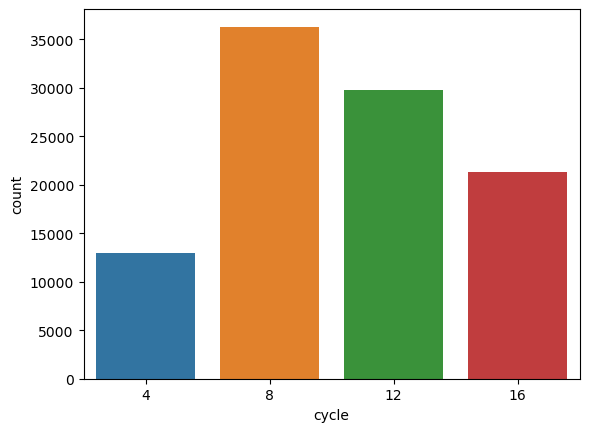

In [22]:
#cycle
print(df['cycle'].value_counts())
sns.countplot(x='cycle', data=df)

In [23]:
#water body id
print(df['id'].value_counts())
#4009051 is coastal areas
#193 is Teshekpuk lake

193       8236
2546      1629
1963       757
2587       628
22769      617
          ... 
245863       2
245645       2
252958       1
242409       1
238203       1
Name: id, Length: 1492, dtype: int64


5    43152
6    39119
4     9907
3     8236
Name: size, dtype: int64


<AxesSubplot: xlabel='size', ylabel='count'>

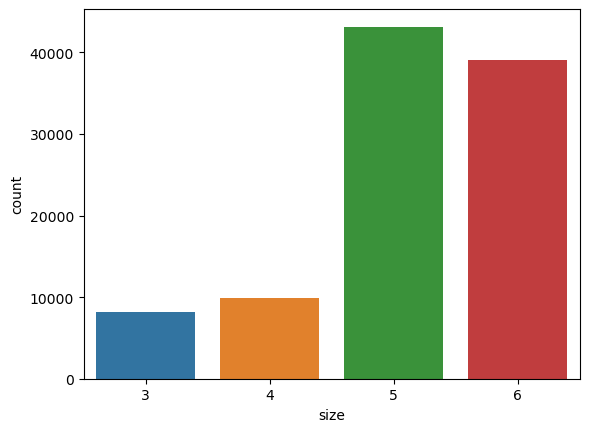

In [24]:
#Size Size of Inland Water Body, where 
#1=Area>10,000 km2, 2=10,000>A≥1,000
#3=1,000>A≥100, 4=100>A≥10
#5=10>A≥1, 6=1>A≥0.1, 7=0.01>A, 

print(df['size'].value_counts())
sns.countplot(x='size', data=df)

0    100414
Name: cloud_flag, dtype: int64


<AxesSubplot: xlabel='cloud_flag', ylabel='count'>

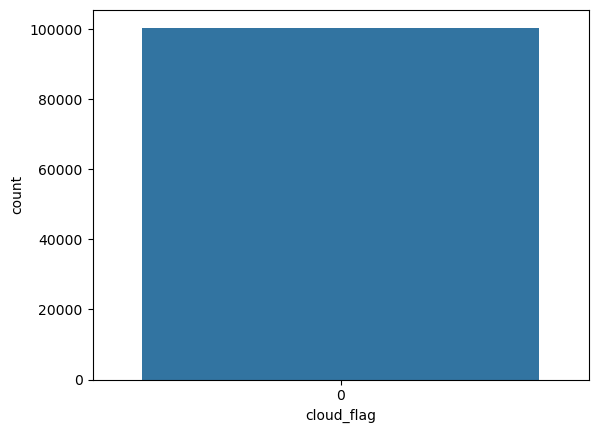

In [25]:
#cloud flag, where 0 = no cloud, 1 = cloud

print(df['cloud_flag'].value_counts())
sns.countplot(x='cloud_flag', data=df)

1.0    53603
2.0    45781
3.0      777
0.0      186
4.0       67
Name: bkgrd_flag, dtype: int64


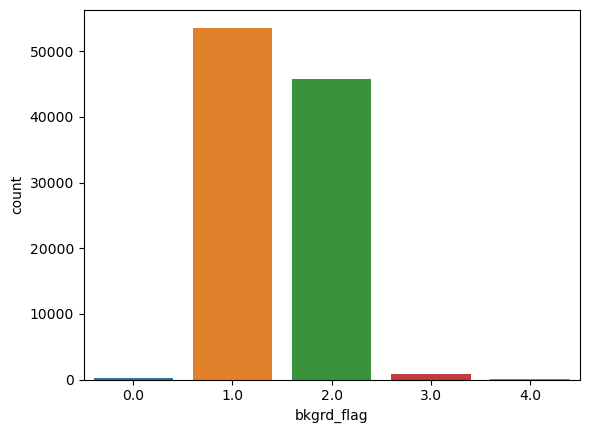

In [26]:
#background flag, describes the degree of background photons present
#in each short segment. 0 <= 0.001, 1: <= 0.01, 2: <=0.05, 3: <=0.1, 4: < = 0.3, 5: < = 0.5,  6: >0.5
#assume 2147483647 is n/a

print(df['bkgrd_flag'].value_counts())
sns.countplot(x='bkgrd_flag', data=df)
df['bkgrd_flag'] = np.where(df['bkgrd_flag'] > 100, np.NaN, df['bkgrd_flag'])

 0    94775
-1     5566
-2       63
 4       10
Name: shallow_flag, dtype: int64


<AxesSubplot: xlabel='shallow_flag', ylabel='count'>

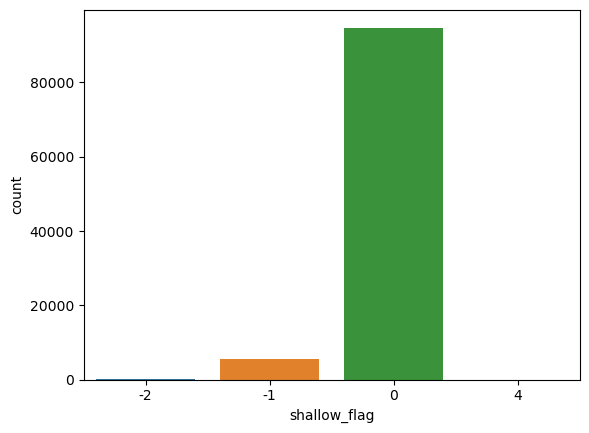

In [27]:
#shallow flag

print(df['shallow_flag'].value_counts())
sns.countplot(x='shallow_flag', data=df)

 0    53829
 1    44928
-1     1557
 2       84
-2       16
Name: wind_flag, dtype: int64


<AxesSubplot: xlabel='wind_flag', ylabel='count'>

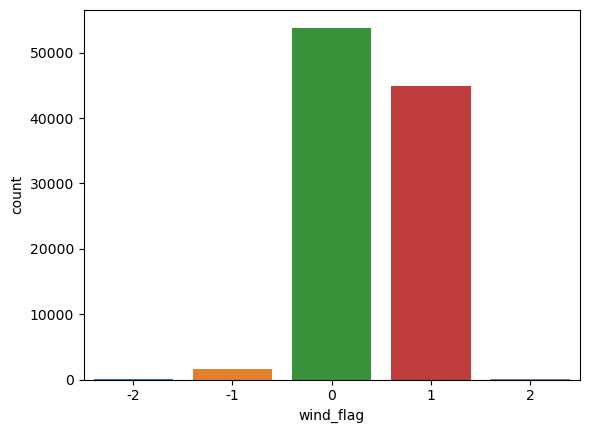

In [28]:
#wind flag

print(df['wind_flag'].value_counts())
sns.countplot(x='wind_flag', data=df)

137     7106
876     6467
251     4832
1021    4731
655     3472
        ... 
937       10
220       10
1143       8
930        7
1028       3
Name: rgt, Length: 133, dtype: int64


<AxesSubplot: xlabel='rgt', ylabel='count'>

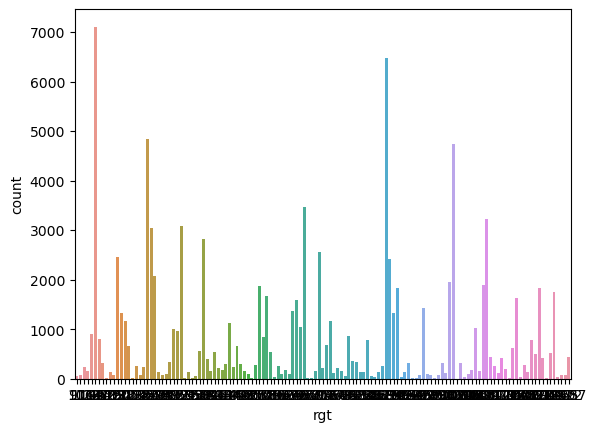

In [29]:
#rgt

print(df['rgt'].value_counts())
sns.countplot(x='rgt', data=df)

In [30]:
df.columns

Index(['cycle', 'id', 'size', 'type', 'cloud_flag', 'bkgrd_flag',
       'shallow_flag', 'wind_flag', 'rgt', 'seg_lat', 'seg_lon',
       'snow_ice_flag', 'wave_flag', 'depth', 'anomalies', 'beam',
       'start_date', 'qual0', 'qual1', 'qual2', 'qual3', 'beg_lat', 'beg_lon',
       'end_lat', 'end_lon', 'sc_orient', 'quality_metric', 'beam_strength'],
      dtype='object')

1    96648
0     3766
Name: snow_ice_flag, dtype: int64


<AxesSubplot: xlabel='snow_ice_flag', ylabel='count'>

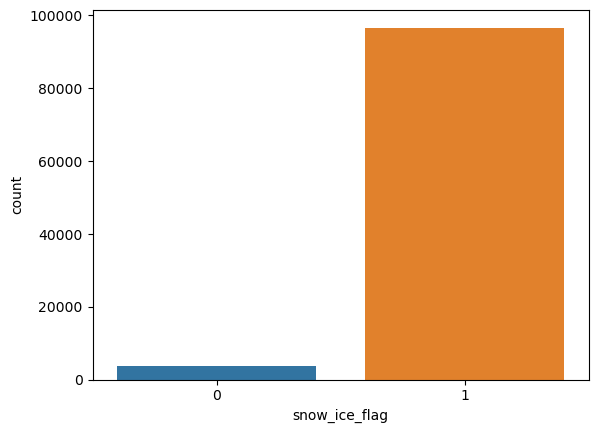

In [31]:
#snow/ice flag, NOAA snow/ice flag scaled by ATL09 
#(0=ice-free water, 1=snow-free land, 2=snow, 3=ice) 

print(df['snow_ice_flag'].value_counts())
sns.countplot(x='snow_ice_flag', data=df)

waves > 2m:  0
waves > 100m:  0
0.020000    22797
0.015000    19805
0.025000    14861
0.030000     6957
0.035000     6666
            ...  
0.264854        1
0.492775        1
0.391829        1
0.221825        1
0.387216        1
Name: wave_flag, Length: 129, dtype: int64
     wave_flag  Counts
0     0.005000    3185
1     0.010000    5468
2     0.015000   19805
3     0.020000   22797
4     0.025000   14861
..         ...     ...
124   0.996063       1
125   1.070966       1
126   1.233870       1
127   1.546774       1
128   1.610845       1

[129 rows x 2 columns]


<AxesSubplot: xlabel='wave_flag', ylabel='Counts'>

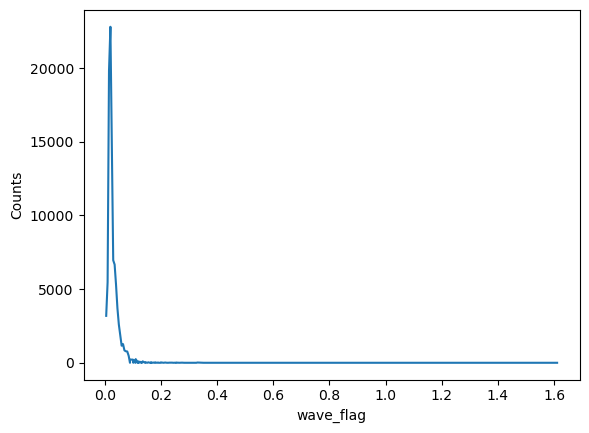

In [32]:
#wave, stdev_water_surf
#assume 3.402823e+38 is NA
print("waves > 2m: ", sum(df['wave_flag'] > 2))
print("waves > 100m: ", sum(df['wave_flag'] > 12.5))
df['wave_flag'] = np.where(df['wave_flag'] > 12.5, np.NaN, df['wave_flag'])

print(df['wave_flag'].value_counts())
df['wave_flag'].describe()

df_grouped = df.groupby(['wave_flag']).size().reset_index()
df_grouped.rename(columns = {0 : 'Counts'}, inplace = True)
print(df_grouped)
sns.lineplot(x='wave_flag', y = 'Counts', data=df_grouped)

2020-07-04 07:41:57+00:00    5375
2019-09-02 22:14:53+00:00    4731
2020-08-21 12:19:11+00:00    3411
2021-08-19 18:58:39+00:00    3056
2020-07-16 02:34:08+00:00    2958
                             ... 
2022-07-16 20:27:42+00:00       8
2020-08-25 04:19:25+00:00       7
2022-09-08 00:31:01+00:00       5
2021-08-02 12:06:07+00:00       4
2021-08-29 17:50:41+00:00       3
Name: start_date, Length: 234, dtype: int64
                   start_date  Counts
0   2019-07-09 22:11:19+00:00      30
1   2019-07-12 00:28:35+00:00      10
2   2019-07-12 06:45:44+00:00      10
3   2019-07-14 09:03:02+00:00      26
4   2019-07-14 21:37:21+00:00      38
..                        ...     ...
229 2022-09-04 02:13:39+00:00     194
230 2022-09-05 15:56:36+00:00    1394
231 2022-09-07 18:13:51+00:00     481
232 2022-09-08 00:31:01+00:00       5
233 2022-09-12 17:39:52+00:00      82

[234 rows x 2 columns]


<AxesSubplot: xlabel='start_date', ylabel='Counts'>

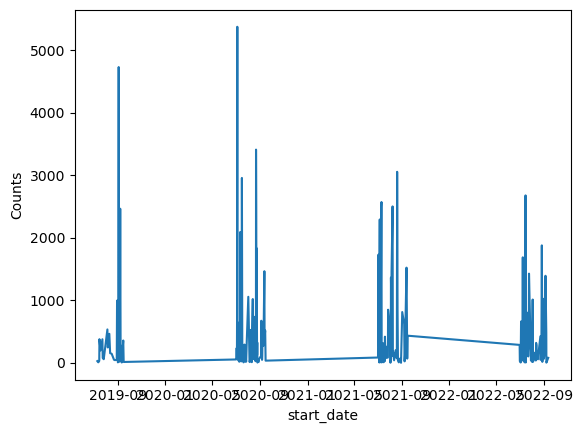

In [33]:
#dates
df['start_date']= pd.to_datetime(df['start_date'])
print(df['start_date'].value_counts())
df_grouped = df.groupby(['start_date']).size().reset_index()
df_grouped.rename(columns = {0 : 'Counts'}, inplace = True)
print(df_grouped)
sns.lineplot(x='start_date', y = 'Counts', data=df_grouped)

3.0    59167
2.0    28365
1.0    12882
Name: anomalies, dtype: int64


<AxesSubplot: xlabel='anomalies', ylabel='count'>

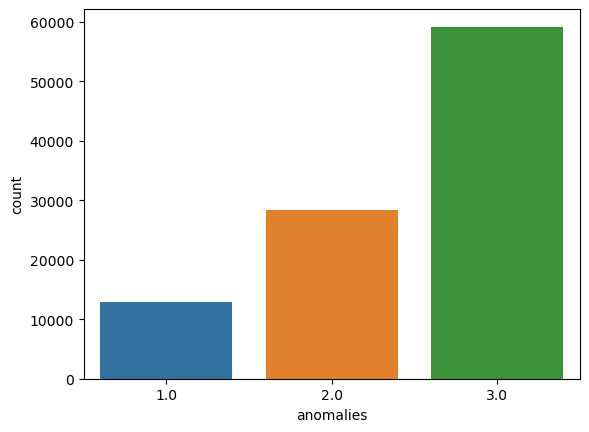

In [34]:
#bottom surface anomalies
#= 1 = Subsurface anomaly due to bottom likely
#= 2 = Subsurface signal may indicate bottom or otheranomaly
#= 3 = Possible subsurface anomaly 

#assume 2147483647 is n/a
 

print(df['anomalies'].value_counts())
df['anomalies'] = np.where(df['anomalies'] > 12.5, np.NaN, df['anomalies'])
sns.countplot(x='anomalies', data=df)

In [35]:
# beams = df['beam'].unique()
# result = [string for string in beams if string.endswith("l")]
# type(result)

df_l = df[df['beam'].str.endswith('l')]
print(df_l.head())

df_r = df[df['beam'].str.endswith('r')]
print(df_r.head())

       cycle      id  size  type  cloud_flag  bkgrd_flag  shallow_flag  \
52858      4  229281     6     1           0         2.0             0   
52859      4  229281     6     1           0         2.0             0   
52860      4  229281     6     1           0         2.0             0   
52861      4  229281     6     1           0         2.0             0   
52862      4  229281     6     1           0         2.0             0   

       wind_flag  rgt    seg_lat  ...  qual1  qual2  qual3    beg_lat  \
52858          0  183  70.392084  ...      0      0      0  70.392221   
52859          0  183  70.391862  ...      0      0      0  70.391970   
52860          0  183  70.391507  ...      0      0      0  70.391695   
52861          0  183  70.391278  ...      0      0      0  70.391392   
52862          0  183  70.391119  ...      0      0      0  70.391170   

          beg_lon    end_lat     end_lon  sc_orient  quality_metric  \
52858 -160.250389  70.392221 -160.250469     

Weak      96732
Strong     3682
Name: beam_strength, dtype: int64


<AxesSubplot: xlabel='beam_strength', ylabel='count'>

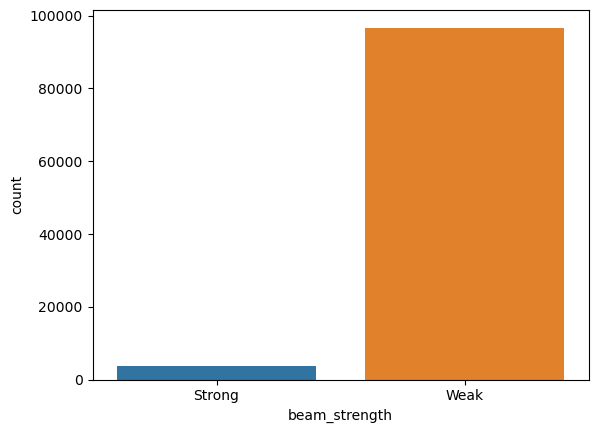

In [36]:
#beam, forward orientation: L = weak, R = strong, backward orientation: R = strong, L = weak
#Beams Flying backwards until Sep 7 '19, forwards to May 14 '20, backwards until Jan 15 '21, 
#forwards until Oct 2 '21, backwards until June 9 '22, forwards until Feb 9 '23

#In our time period this means that:
 #July 1, 2019 - Sep 7, 2019 backward: L = strong, R = Weak
 #Sep 7, 2019 - Sep 15 2019 forward L = weak, R = Strong
 #July 1, 2020 - Sep 15, 2020 backward L = strong, R = Weak
 #July 1, 2021 - Sep 15, 2021 forward L = weak, R = Strong
 #July 1, 2022 - Sep 15, 2022 forward L = weak, R = Strong

print(df['beam_strength'].value_counts())
sns.countplot(x='beam_strength', data=df)

gt2r    19305
gt1r    17447
gt2l    16923
gt1l    16402
gt3r    16106
gt3l    14231
Name: beam, dtype: int64


<AxesSubplot: xlabel='beam', ylabel='count'>

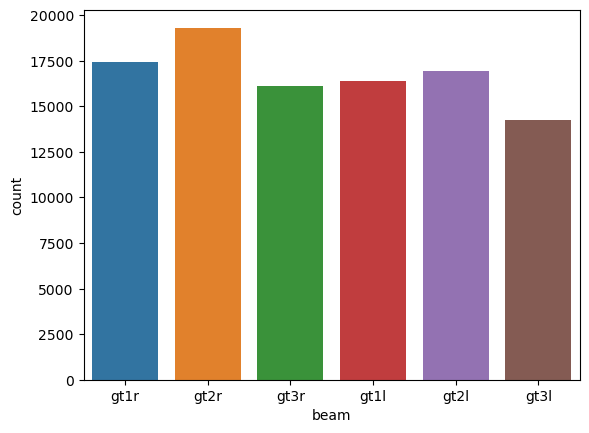

In [37]:
print(df['beam'].value_counts())
sns.countplot(x='beam', data=df)

  quality     count
0   qual0  14029716
1   qual1     35055
2   qual2    219933
3   qual3         0


<AxesSubplot: xlabel='quality', ylabel='count'>

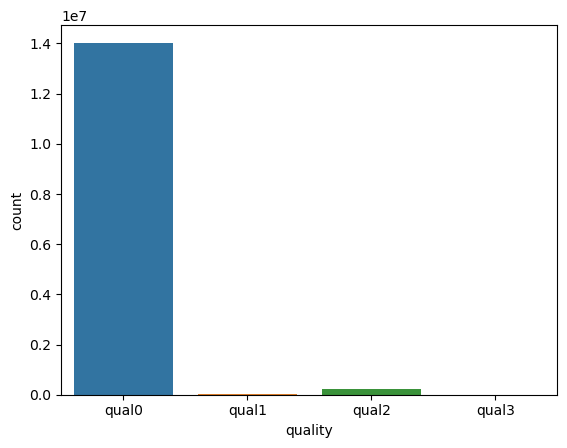

In [38]:
#Quality Dimension scale indexing the short segment quality array.
#Index = 1 corresponds to nominal; Index = 2 corresponds to possible afterpulse; Index = 3 corresponds to possible
#impulse response; Index = 4 corresponds to possible TEP 
quality = df[['qual0','qual1','qual2','qual3']]

quality_tot = quality.sum().to_frame()
quality_tot.reset_index(inplace=True)

quality_tot.columns = ['quality', "count"]
print(quality_tot)
sns.barplot(data = quality_tot, x = "quality", y = "count")

<AxesSubplot: xlabel='quality_metric', ylabel='Count'>

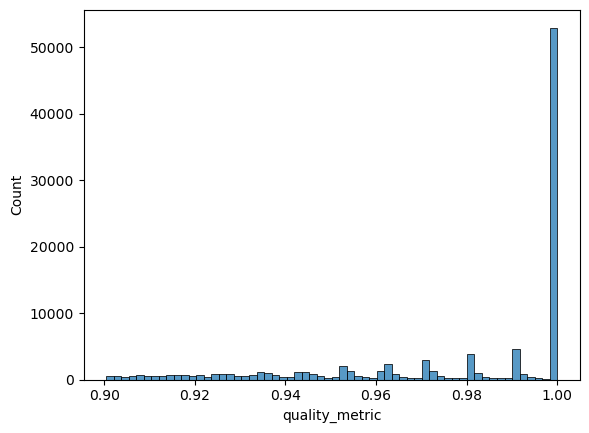

In [39]:
#Quality Dimension scale indexing the short segment quality array.
#Index = 1 corresponds to nominal; Index = 2 corresponds to possible afterpulse; Index = 3 corresponds to possible
#impulse response; Index = 4 corresponds to possible TEP 
df['quality_metric'] = df['qual0']/(df['qual0'] + df['qual1'] + df['qual2'] + df['qual3'])

sns.histplot(x='quality_metric', data=df)

14.625832    20
14.929987    15
0.938918     10
1.107069     10
4.916690     10
             ..
0.678840      1
12.489133     1
8.748735      1
0.693715      1
14.349266     1
Name: depth, Length: 11724, dtype: int64
14.625832    20
14.929987    15
0.938918     10
1.107069     10
4.916690     10
             ..
0.678840      1
12.489133     1
8.748735      1
0.693715      1
14.349266     1
Name: depth, Length: 11724, dtype: int64


<AxesSubplot: xlabel='depth', ylabel='Count'>

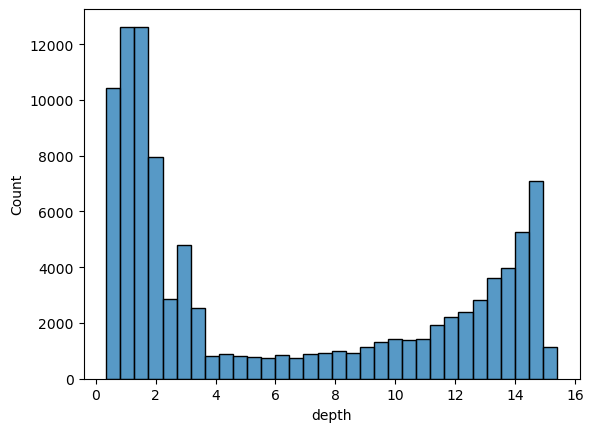

In [40]:
#depth (m)
#3.402823e+38 is NA?

print(df['depth'].value_counts())
df['depth'] = np.where(df['depth'] > 100, np.NaN, df['depth'])
print(df['depth'].value_counts())

sns.histplot(x='depth', data=df)

67.520551    1
70.669381    1
70.669576    1
70.669613    1
70.669695    1
            ..
69.831259    1
69.831315    1
69.831385    1
69.831454    1
69.683990    1
Name: seg_lat, Length: 100414, dtype: int64
seg_lat missing data:  0


<AxesSubplot: xlabel='Count', ylabel='seg_lat'>

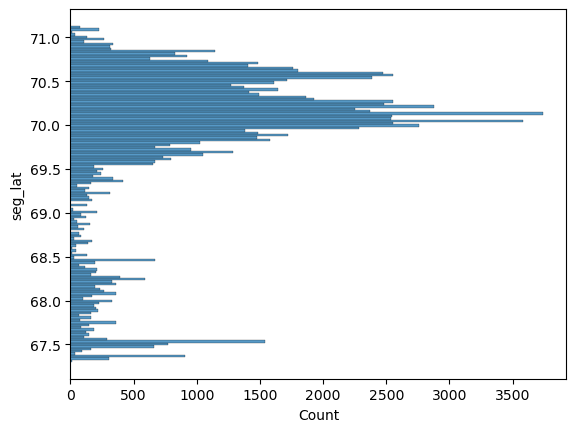

In [41]:
#Lat, segment
print(df['seg_lat'].value_counts())
print("seg_lat missing data: ", sum(df['seg_lat'] > 80))
sns.histplot(y='seg_lat', data=df)

-148.468708    1
-153.825303    1
-153.825228    1
-153.825213    1
-153.825182    1
              ..
-149.124310    1
-149.124290    1
-149.124266    1
-149.124242    1
-161.800208    1
Name: seg_lon, Length: 100414, dtype: int64
seg_lon missing data:  0


<AxesSubplot: xlabel='seg_lon', ylabel='Count'>

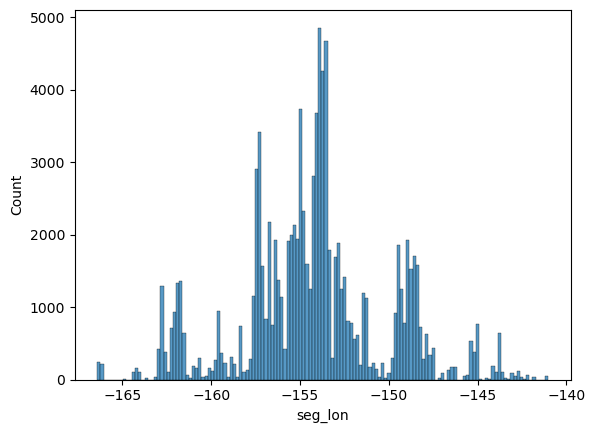

In [42]:
#Lon, segment
print(df['seg_lon'].value_counts())
print("seg_lon missing data: ", sum(df['seg_lon'] > 0))
sns.histplot(x='seg_lon', data=df)